#### Quando i nostri ristoranti vendono di più? In corrispondenza di che festività? 

In [1]:
import pandas as pd
import datetime
import holidays
from collections import ChainMap

In [2]:
data_cleaned=pd.read_csv("datapuliti.csv", index_col=0)

In [3]:
data_cleaned["Date"]=pd.to_datetime(data_cleaned["Date"])

In [4]:
# Select country
it_holidays_2017= holidays.Italy(years = 2017)
it_holidays_2018= holidays.Italy(years = 2018)
it_holidays_2019= holidays.Italy(years = 2019)
it_holidays_2020= holidays.Italy(years = 2020)
it_holidays_2021= holidays.Italy(years = 2021)

In [5]:
d4 = dict(it_holidays_2017)
d4.update(it_holidays_2018)
d4.update(it_holidays_2019)
d4.update(it_holidays_2020)
d4.update(it_holidays_2021)

In [6]:
def ciao(x):
    l=list(d4.keys())
    y=0
    for i in l: 
        if x ==i:
            y=d4.get(i)
    return y


data_cleaned['Holidays']=data_cleaned['Date'].apply(ciao)

        
    

In [7]:
data_1=data_cleaned.groupby("Holidays",as_index=False)["Vendite_1"].sum()
data_1= data_1.drop(labels=0,axis=0)

In [8]:
data_2=data_cleaned.groupby("Holidays",as_index=False)["Vendite_2"].sum()
data_2= data_2.drop(labels=0,axis=0)

In [9]:
data_3=data_cleaned.groupby("Holidays",as_index=False)["Vendite_3"].sum()
data_3= data_3.drop(labels=0,axis=0)

In [10]:
data_4=data_cleaned.groupby("Holidays",as_index=False)["Vendite_4"].sum()
data_4= data_4.drop(labels=0,axis=0)

In [11]:
data_5=data_cleaned.groupby("Holidays",as_index=False)["Vendite_5"].sum()
data_5= data_5.drop(labels=0,axis=0)

In [12]:
data_6=data_cleaned.groupby("Holidays",as_index=False)["Vendite_6"].sum()
data_6= data_6.drop(labels=0,axis=0)

#### 1. Analisi descrittiva - correlazioni, pie chart, bar chart, scatter plot, box plot


Scegliamo di indagare i ristoranti 1 e 2 nel tempo per ogni festività

Ristorante 1,2,5 con overall sales >20000
Ristorante 3,4,6 con overall sales<20000



NATALE

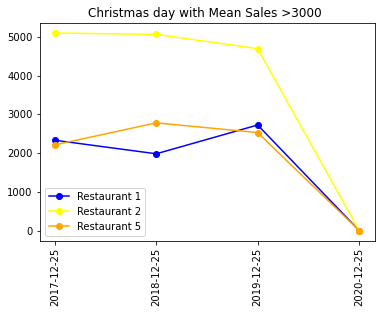

In [16]:
#natale, ho messo la soglia a 3000
natale=data_cleaned[data_cleaned["Holidays"]=="Natale"]
natale_1=natale[["Date","Vendite_1"]]
natale_2=natale[["Date","Vendite_2"]]
natale_5=natale[["Date","Vendite_5"]]
natale_6=natale[["Date","Vendite_6"]] #il 3 e il 4 sono chiusi


#plottiamo in due grafici separati i ristoranti con guadagno non festivo medio <3000 e i un altro quelli >3000
#sales non festive>3000
#plt.figure(figsize=(8,9), dpi=80)

plt.plot( 'Date', 'Vendite_1', data=natale_1, marker='o', color='blue',label="Restaurant 1")
plt.plot( 'Date', 'Vendite_2', data=natale_2, marker='o', color='yellow',label="Restaurant 2")
plt.plot( 'Date', 'Vendite_5', data=natale_5, marker='o', color='orange',label="Restaurant 5")

plt.title("Christmas day with Mean Sales >3000 ")
plt.xticks(natale_1["Date"], rotation="vertical")
plt.legend()
plt.show()


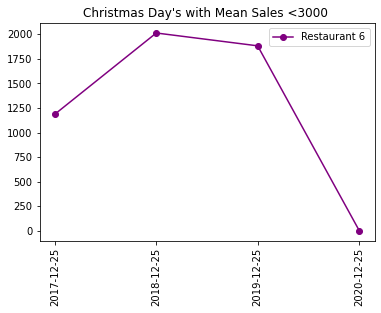

In [17]:
plt.plot( 'Date', 'Vendite_6', data=natale_6, marker='o', color='purple',label="Restaurant 6")
plt.title("Christmas Day's with Mean Sales <3000 ")
plt.xticks(natale_6["Date"], rotation="vertical")
plt.legend()
plt.show()

LUNEDì DELL'ANGELO

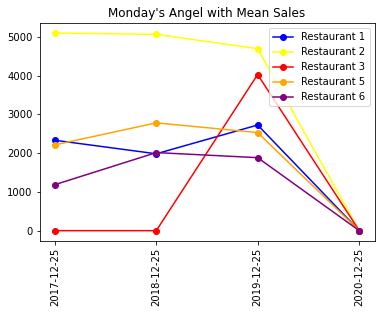

In [18]:
#lunedì dell'angelo, non ho messo una soglia
mondaysangel=data_cleaned[data_cleaned["Holidays"]=="Lunedì dell'Angelo"]
mondaysangel_1=natale[["Date","Vendite_1"]]
mondaysangel_2=natale[["Date","Vendite_2"]]
mondaysangel_3=natale[["Date","Vendite_3"]]
mondaysangel_5=natale[["Date","Vendite_5"]]
mondaysangel_6=natale[["Date","Vendite_6"]] #il 4 è chiuso


#plt.figure(figsize=(8,9), dpi=80)

plt.plot( 'Date', 'Vendite_1', data=mondaysangel_1, marker='o', color='blue',label="Restaurant 1")
plt.plot( 'Date', 'Vendite_2', data=mondaysangel_2, marker='o', color='yellow',label="Restaurant 2")
plt.plot( 'Date', 'Vendite_3', data=mondaysangel_3, marker='o', color='red',label="Restaurant 3")
plt.plot( 'Date', 'Vendite_5', data=mondaysangel_5, marker='o', color='orange',label="Restaurant 5")
plt.plot( 'Date', 'Vendite_6', data=mondaysangel_6, marker='o', color='purple',label="Restaurant 6")

plt.title("Monday's Angel with Mean Sales")
plt.xticks(natale_1["Date"], rotation="vertical")
plt.legend()
plt.show()

#### 2. A seguito dell'analisi descrittiva quali bar teniamo? Quali sono statisticamente significativi? Su quali andiamo a fare forecasting?
#### 3. Ricerca modello SERIE (arima, sarima) - correlazioni, stagionalità, forecasting(quanto venderanno nel Natale 2021? E a Pasqua 2022?) 